## CCAM (Yellow River)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/datasets/CCAM.ipynb)

[![View Source on GitHub](https://img.shields.io/badge/github-view%20source-black.svg)](https://github.com/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/datasets/CCAM.ipynb)


This notebook explores CCAM dataset which introduced by [Hao et al., 2021](https://essd.copernicus.org/articles/13/5591/2021/).

In [1]:
from ai4water.eda import EDA
from ai4water.datasets import CCAM
from ai4water.utils.utils import get_version_info

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from easy_mpl import hist, ridge
from easy_mpl import scatter
from easy_mpl.utils import process_cbar


**********Tensorflow models could not be imported **********



C:\Users\ather\.conda\envs\cat_aware\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
for k,v in get_version_info().items():
    print(k, v)

python 3.8.17 (default, Jul  5 2023, 20:44:21) [MSC v.1916 64 bit (AMD64)]
os nt
ai4water 1.07
easy_mpl 0.21.3
SeqMetrics 1.3.4
numpy 1.24.3
pandas 1.3.4
matplotlib 3.6.0
sklearn 1.3.0
xarray 0.20.1
netCDF4 1.5.7
seaborn 0.12.2


In [3]:
dataset = CCAM(
    path=r"E:\data\gscad\CAMELS\CCAM"   # set path to None if you have not already downloaded data
)



    Not downloading the data since the directory 
    E:\data\gscad\CAMELS\CCAM already exists.
    Use overwrite=True to remove previously saved files and download again


In [4]:
dataset.start

Timestamp('1999-01-02 00:00:00')

In [5]:
dataset.end

Timestamp('2020-12-31 00:00:00')

In [6]:
stations = dataset.stations()
len(stations)

102

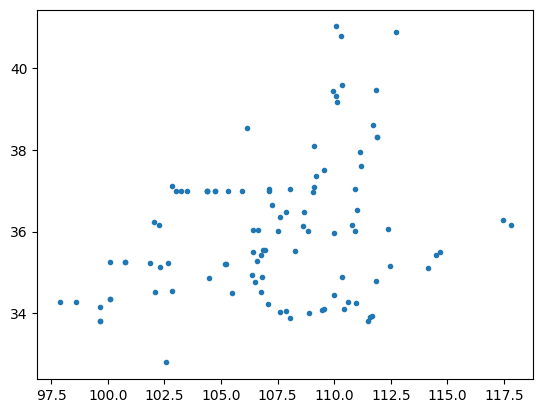

<AxesSubplot: >

In [7]:
dataset.plot_stations()

### Static Data

In [8]:
dataset.static_features

['area',
 'barren',
 'bdticm',
 'bldfie_sl1',
 'bldfie_sl2',
 'bldfie_sl3',
 'bldfie_sl4',
 'bldfie_sl5',
 'bldfie_sl6',
 'bldfie_sl7',
 'cecsol_sl1',
 'cecsol_sl2',
 'cecsol_sl3',
 'cecsol_sl4',
 'cecsol_sl5',
 'cecsol_sl6',
 'cecsol_sl7',
 'circulatory_ratio',
 'clay',
 'closed_shrubland',
 'compactness_coefficient',
 'cropland',
 'cropland_natural_vegetaion',
 'deciduous_broadleaf_tree',
 'deciduous_needleleaf_tree',
 'elev',
 'elongation_ratio',
 'ev',
 'evergreen_broadleaf_tree',
 'evergreen_needleleaf_tree',
 'evp_mean',
 'form_factor',
 'frac_snow_daily',
 'geol_permeability',
 'geol_porosity',
 'grassland',
 'grav',
 'gst_mean',
 'high_prec_dur',
 'high_prec_freq',
 'high_prec_timing',
 'ig',
 'lai_dif',
 'lai_max',
 'lat',
 'length',
 'length_continuous_runoff',
 'log_k_s_l1',
 'log_k_s_l2',
 'log_k_s_l3',
 'log_k_s_l4',
 'log_k_s_l5',
 'log_k_s_l6',
 'lon',
 'low_prec_dur',
 'low_prec_freq',
 'low_prec_timing',
 'mixed_forest',
 'mt',
 'nd',
 'ndvi_mean',
 'open_shrubland',
 

In [9]:
q = ''
lc01 = ''
nvis = ''
anngro = ''
gromega = ''
npp = ''

In [10]:
static = dataset.fetch_static_features(stn_id=stations)
static.shape

(102, 124)

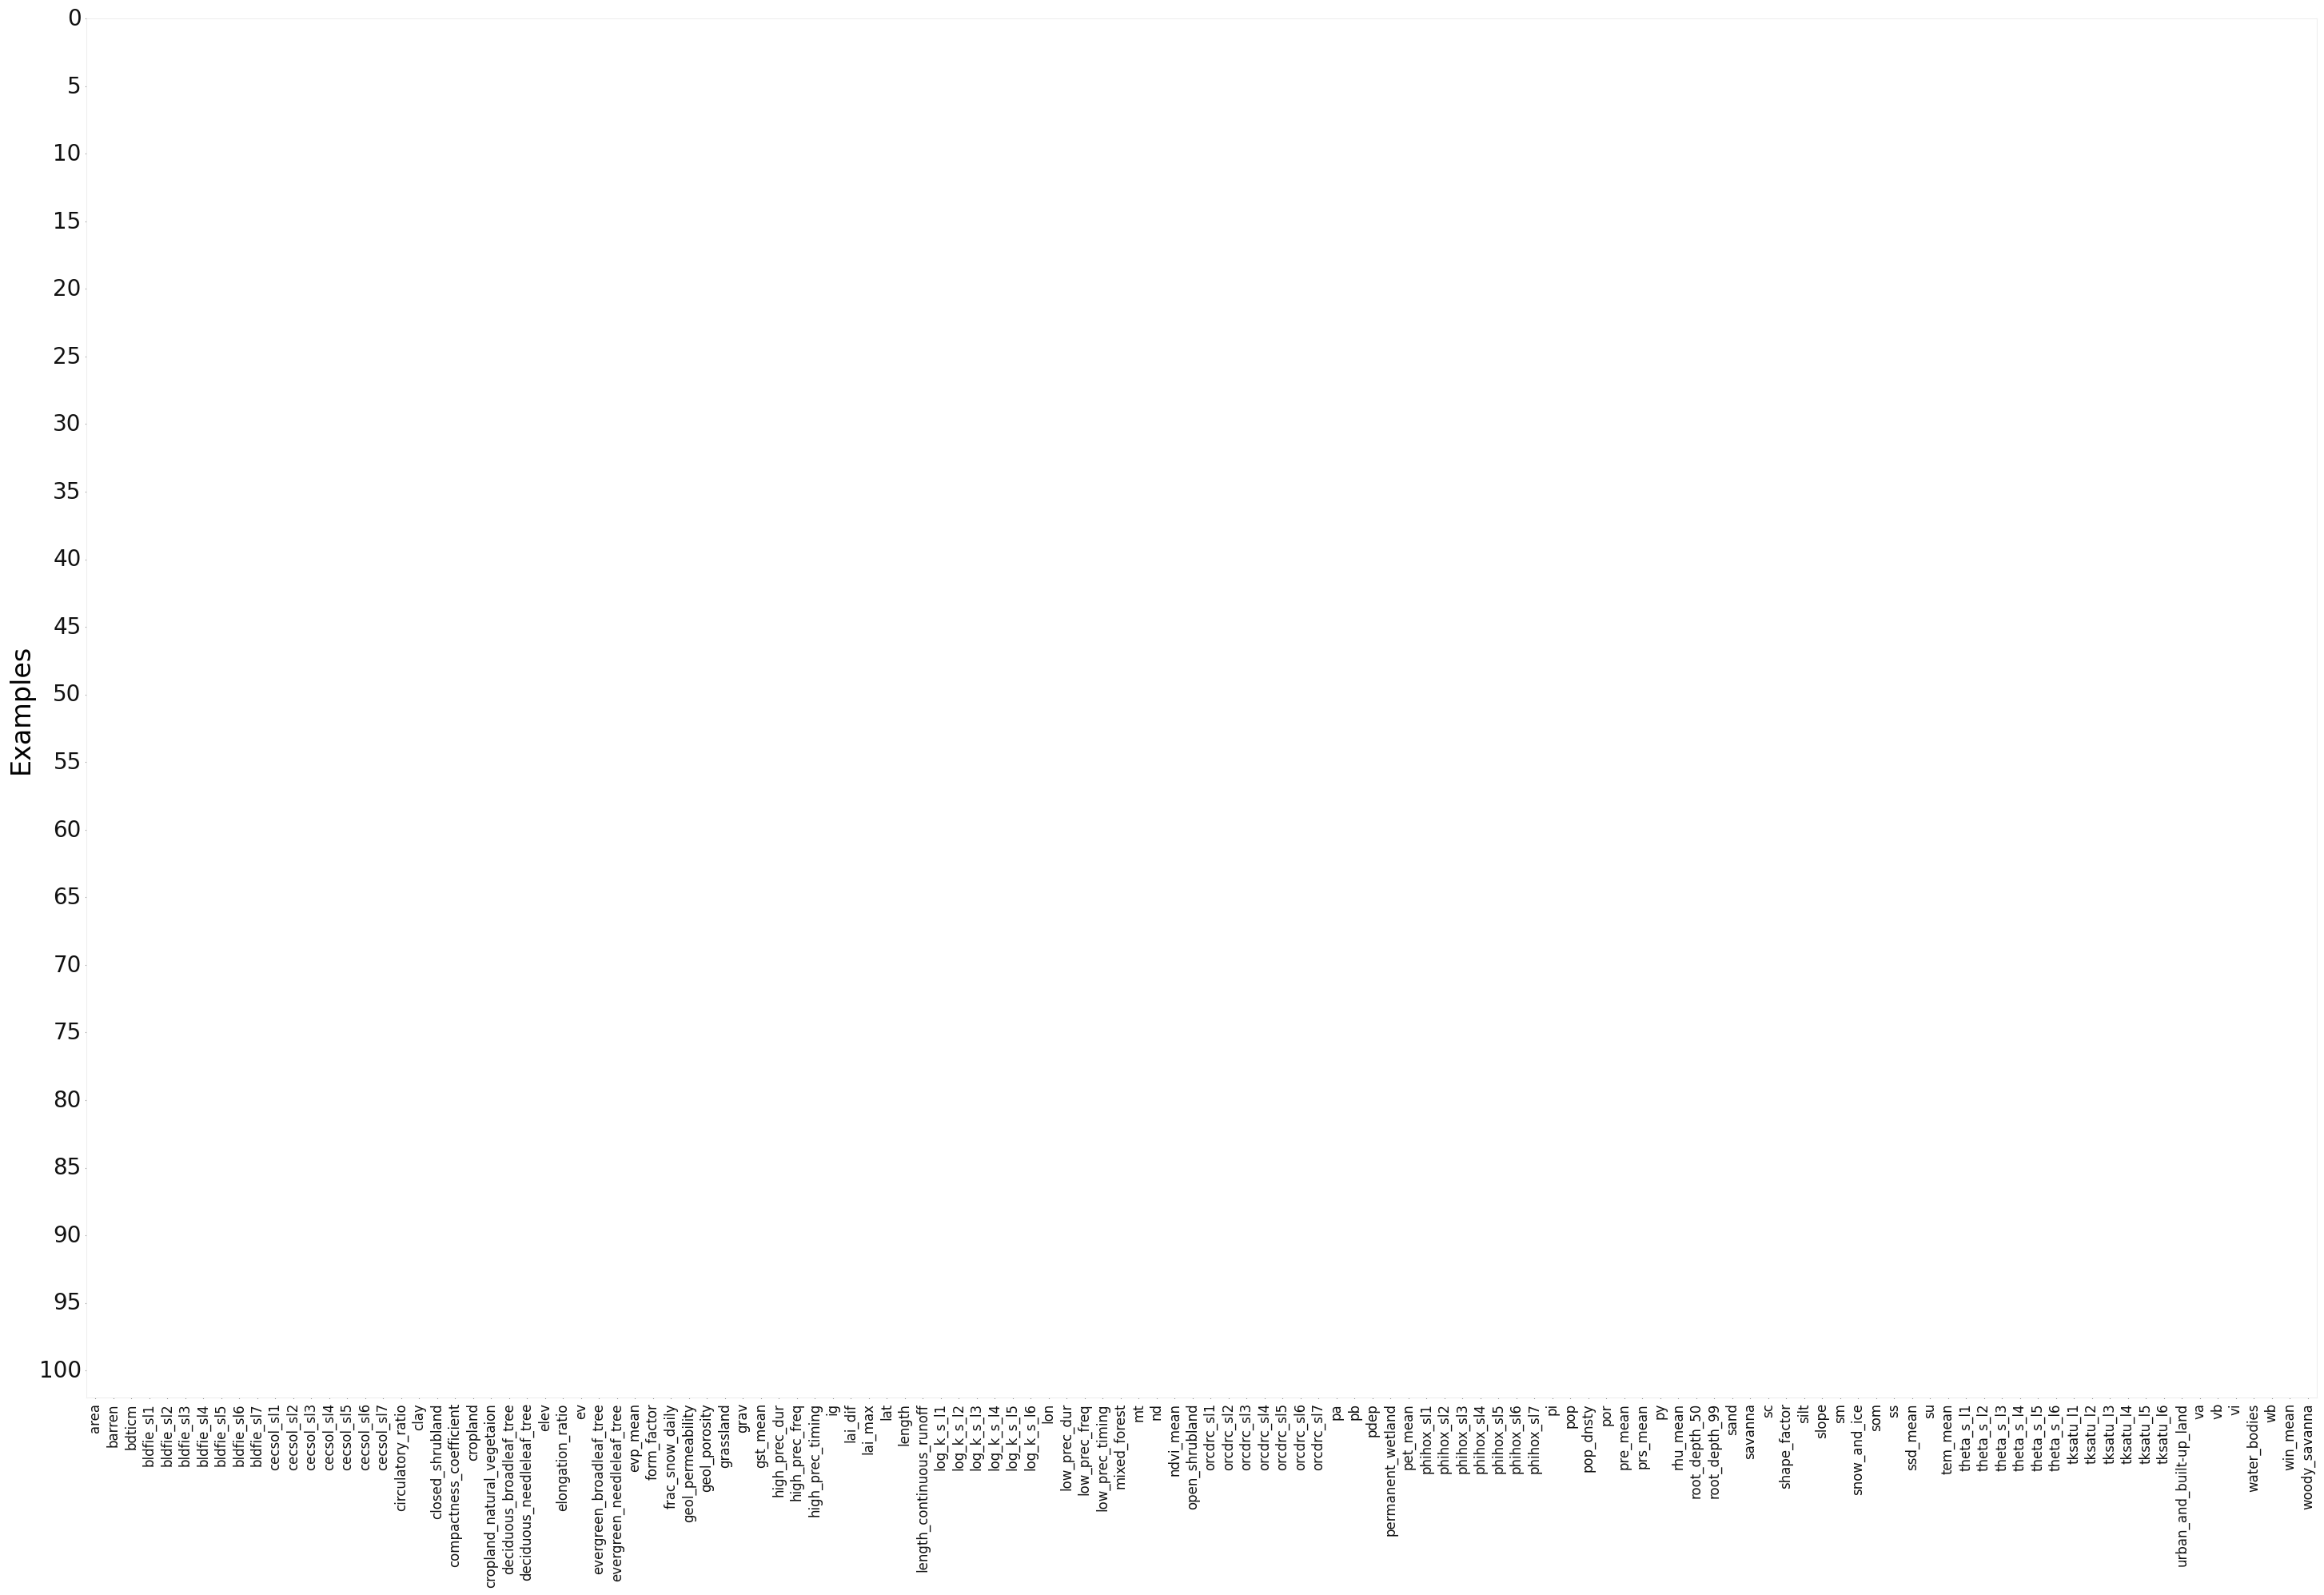

<AxesSubplot: ylabel='Examples'>

In [11]:
EDA(data=static, save=False).heatmap()

In [12]:
physical_features = []
soil_features = []
geological_features = []
flow_characteristics = []

In [13]:
static = static.dropna(axis=1)
static.shape

(102, 124)

In [14]:
coords = dataset.stn_coords()
lat = coords['lat'].astype(float).values.reshape(-1,)
long = coords['long'].astype(float).values.reshape(-1,)

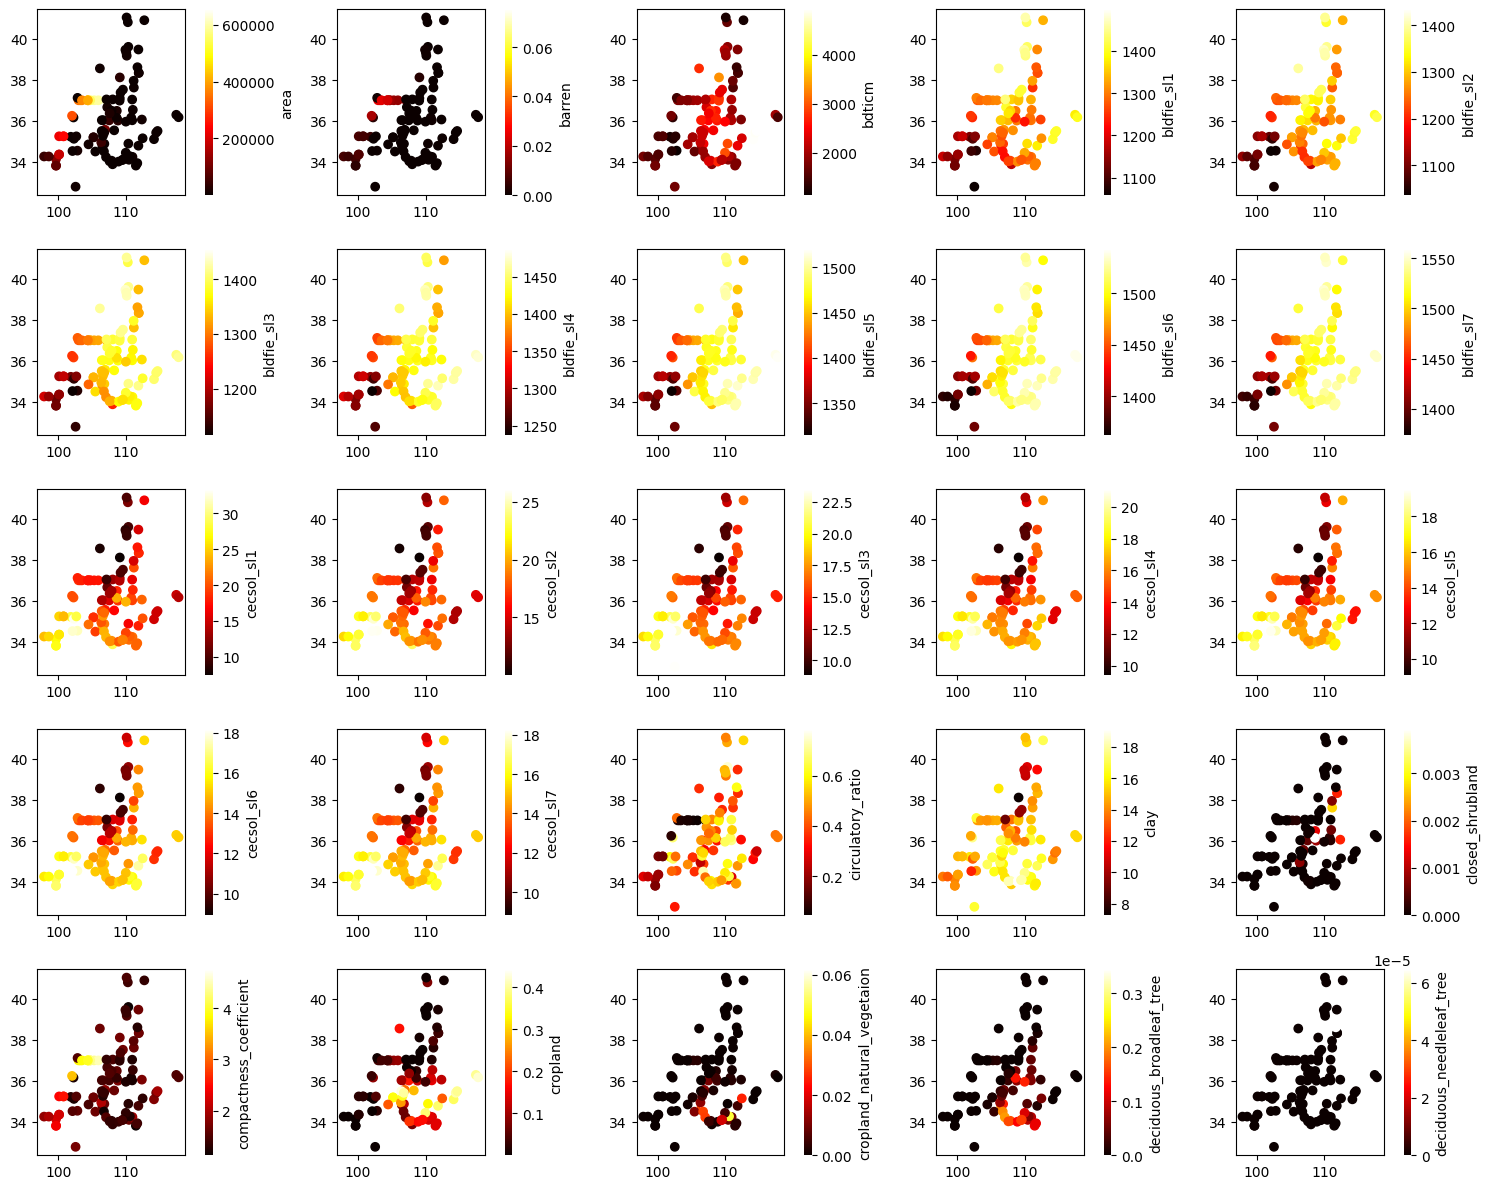

25


In [15]:
idx = 0
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

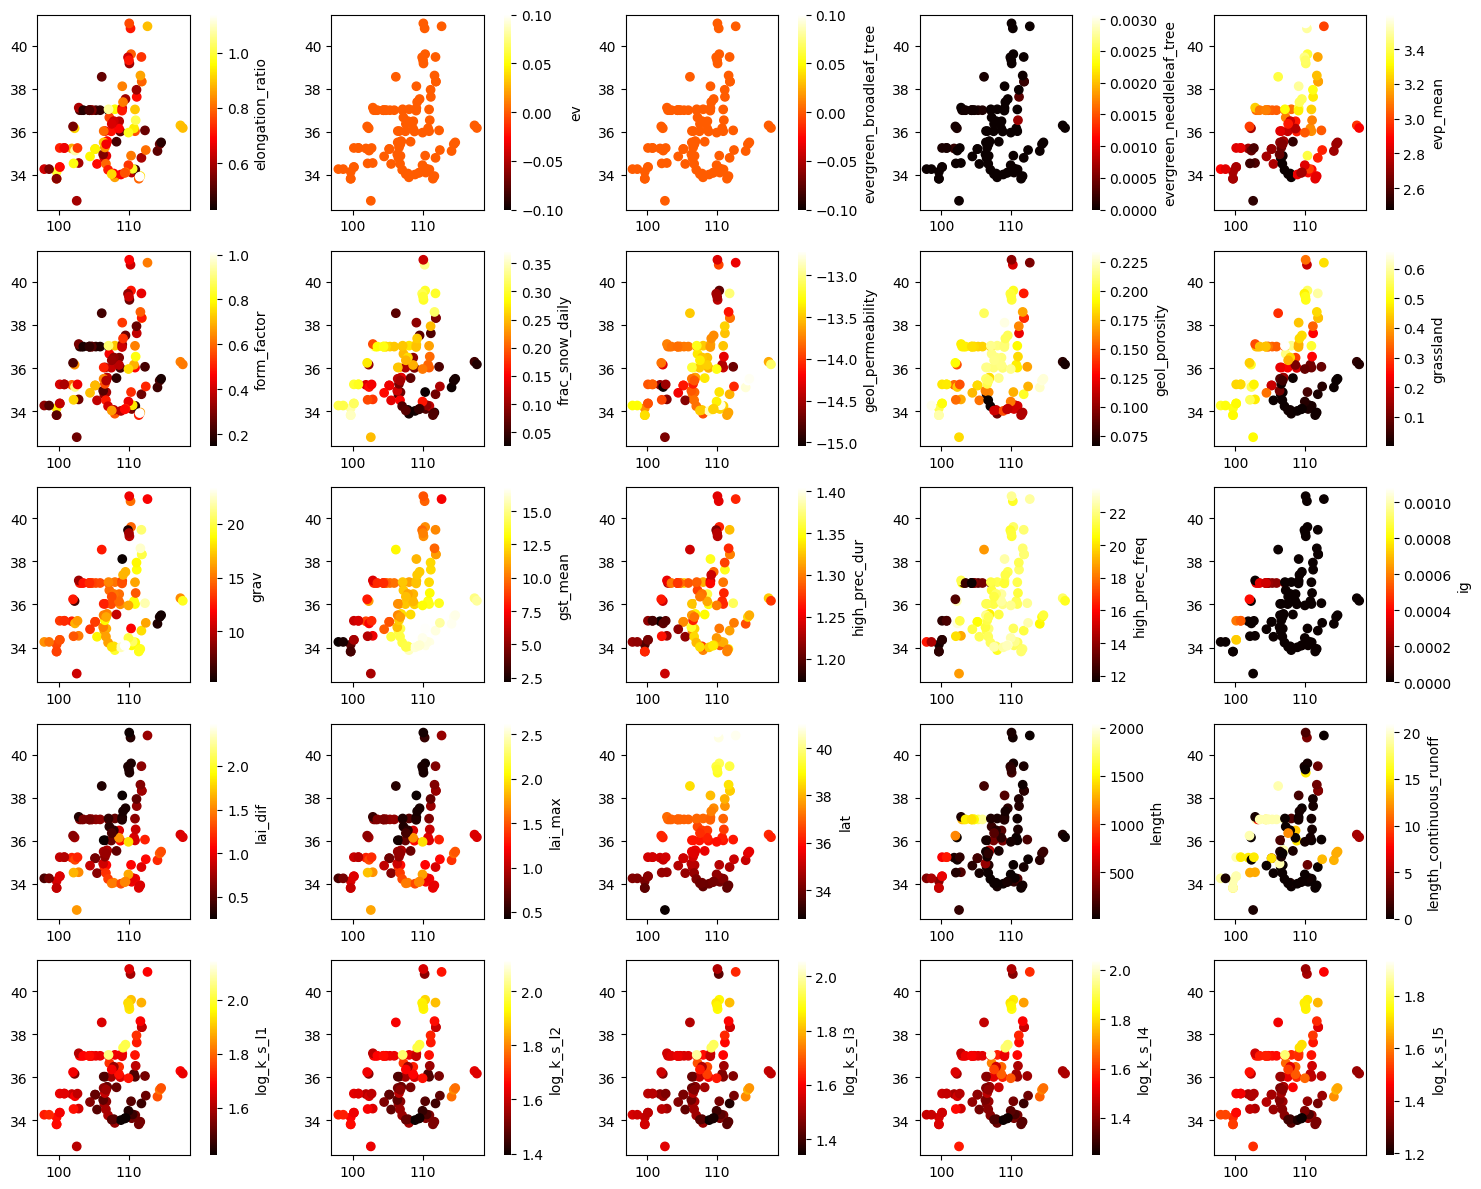

52


In [16]:
idx = 26
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

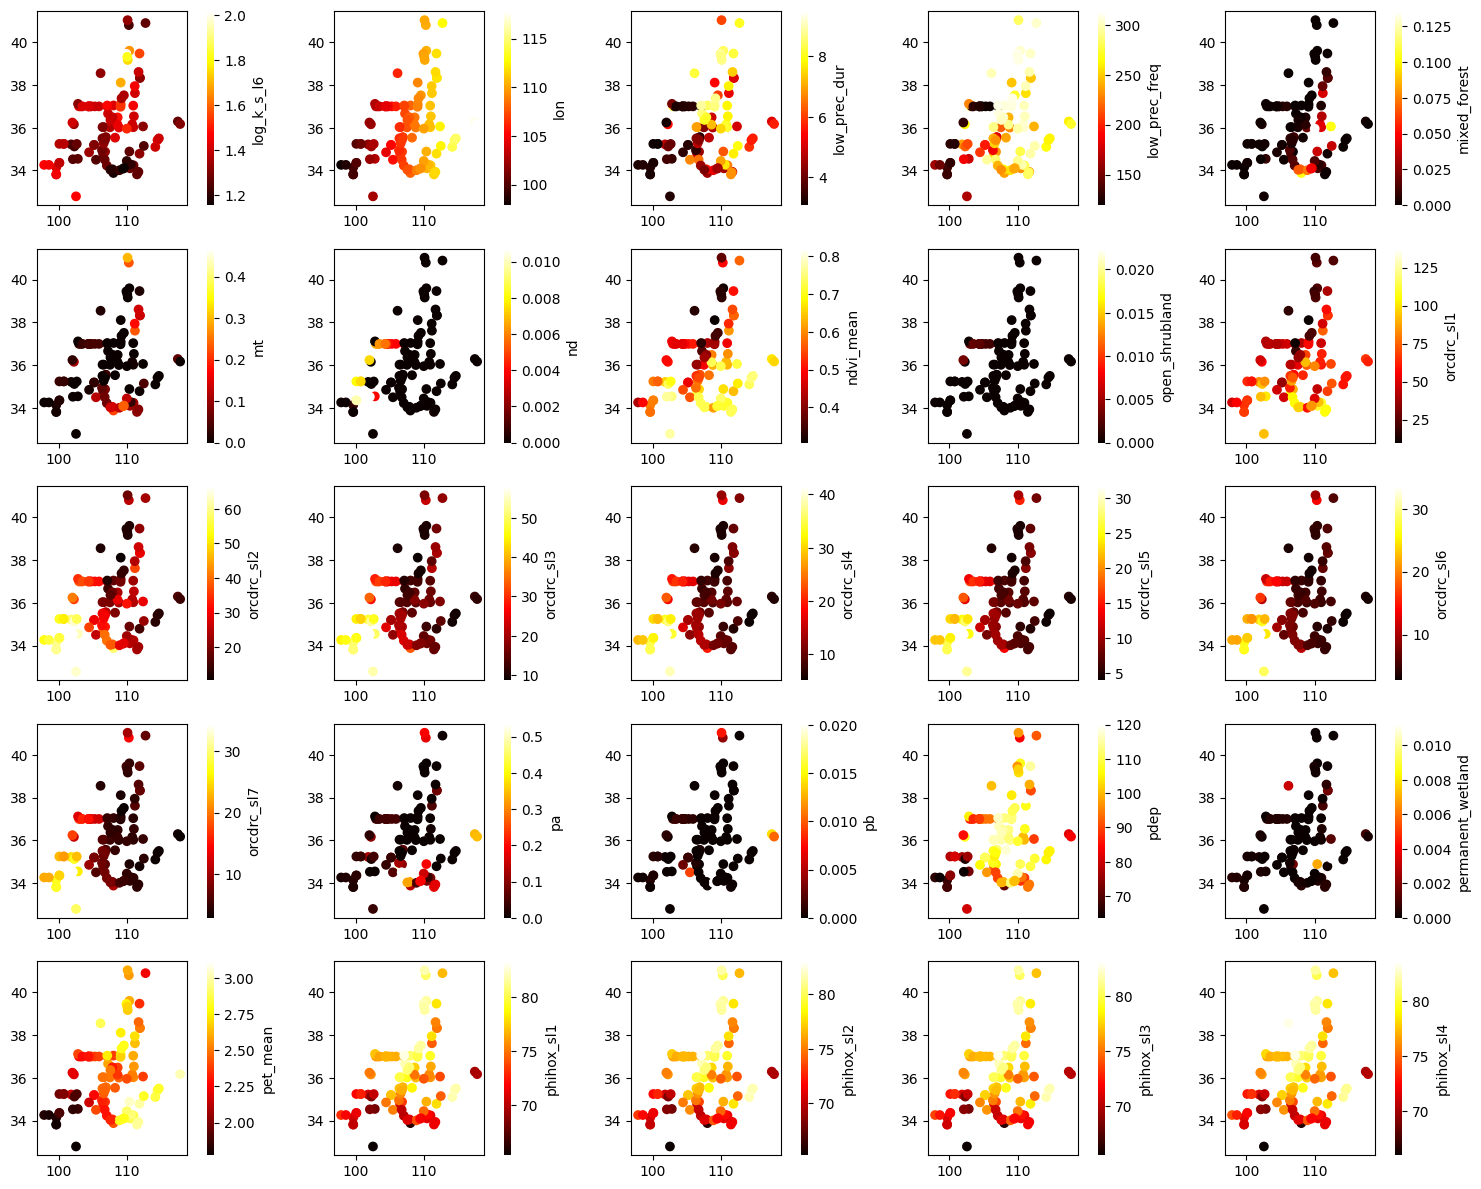

78


In [17]:
idx = 52
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

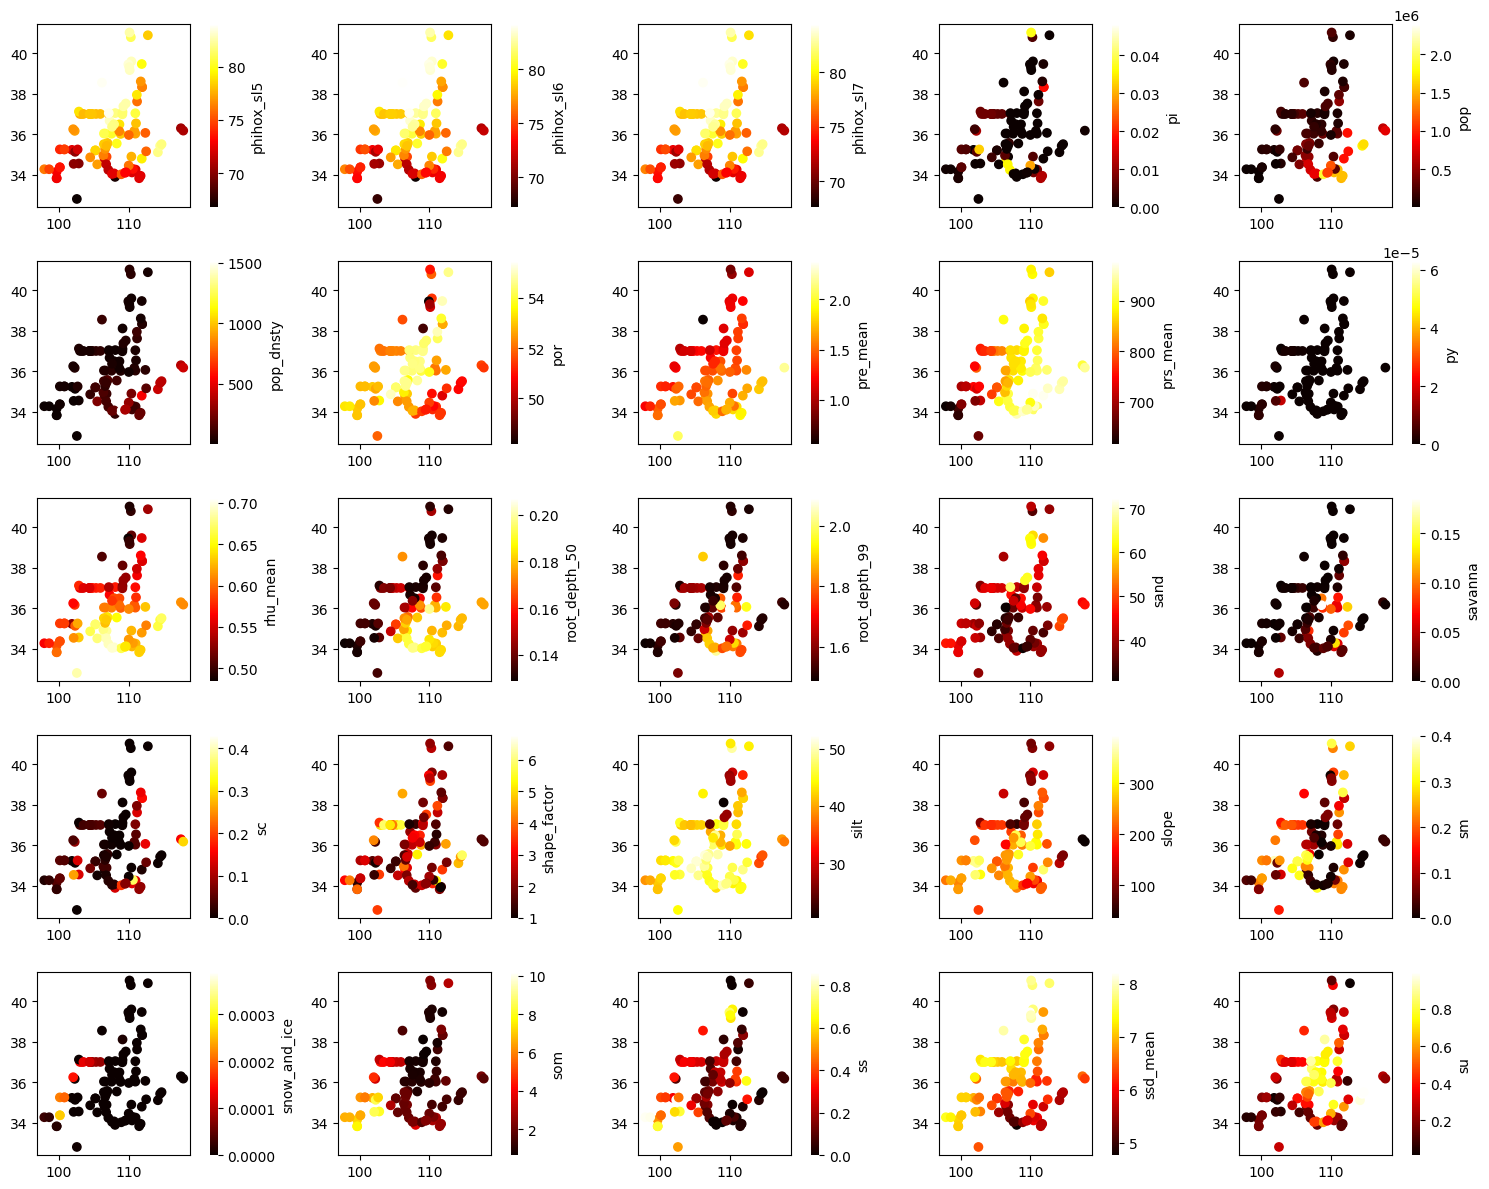

103


In [18]:
idx = 78
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

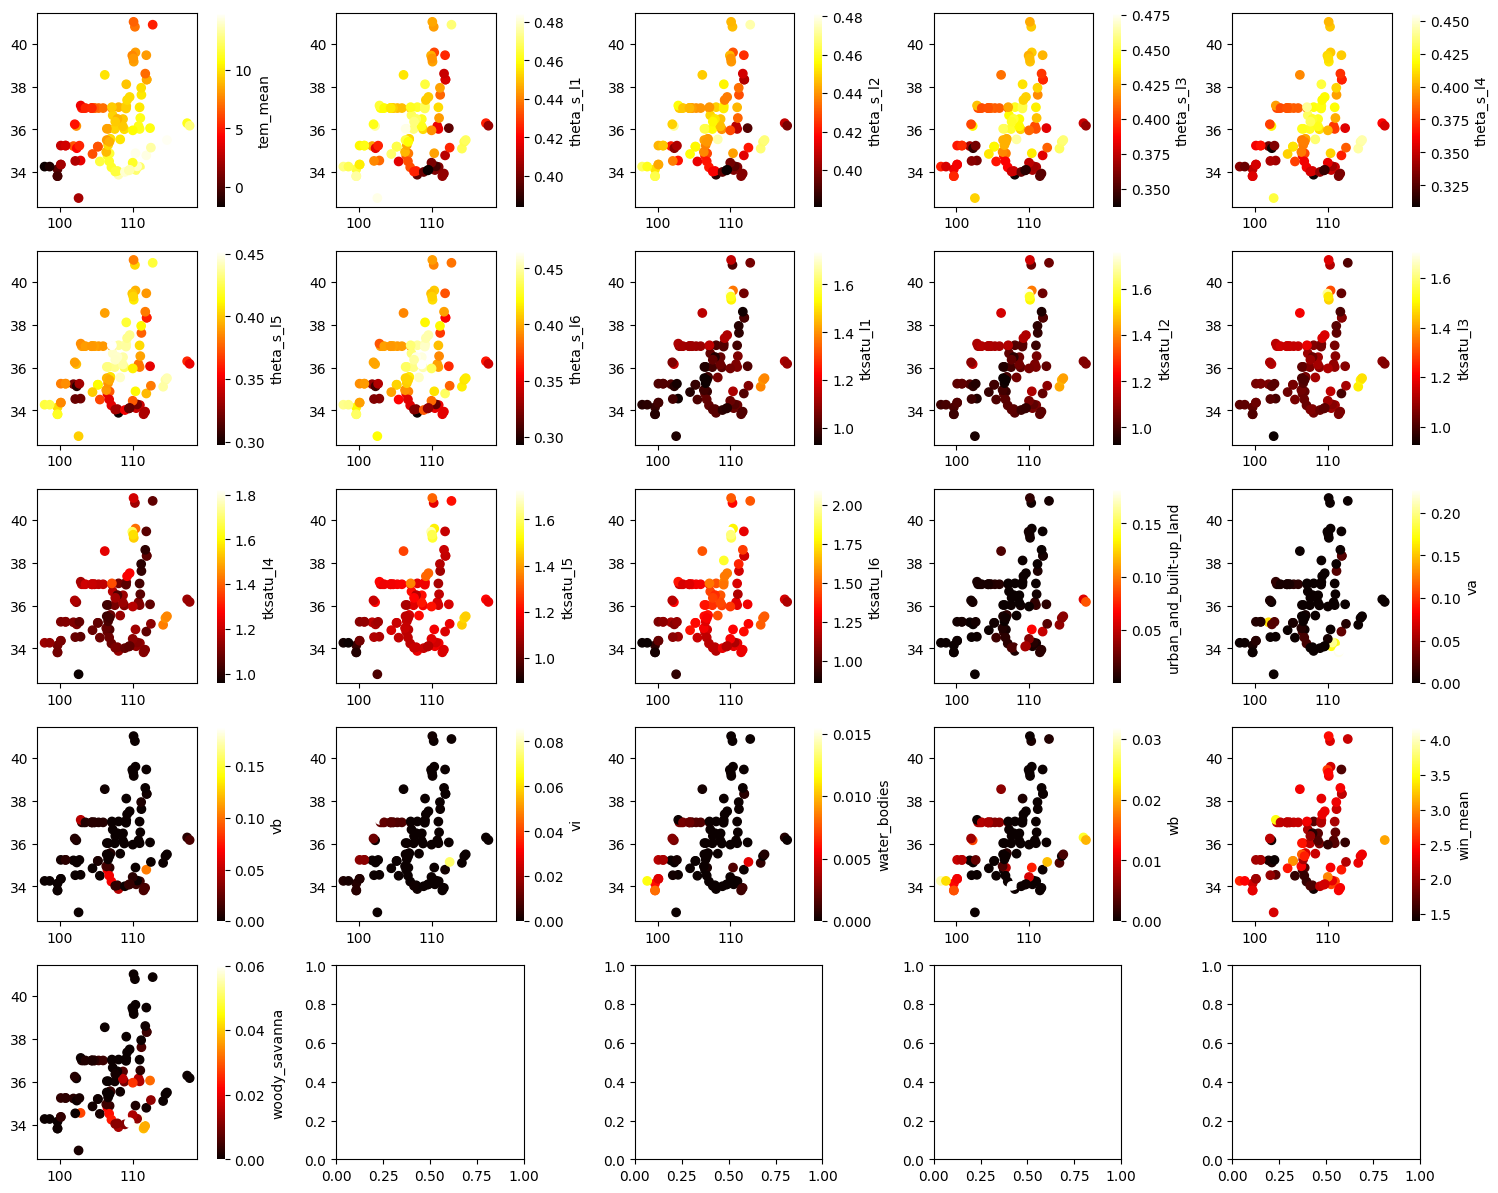

124


In [19]:
idx = 103
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

### Dynamic Features

In [20]:
dataset.dynamic_features

['pre',
 'evp',
 'gst_mean',
 'prs_mean',
 'tem_mean',
 'rhu',
 'win_mean',
 'gst_min',
 'prs_min',
 'tem_min',
 'gst_max',
 'prs_max',
 'tem_max',
 'ssd',
 'win_max',
 'q']

#### Streamflow

In [21]:
streamflow = dataset.q_mmd()
streamflow.shape

(8035, 102)

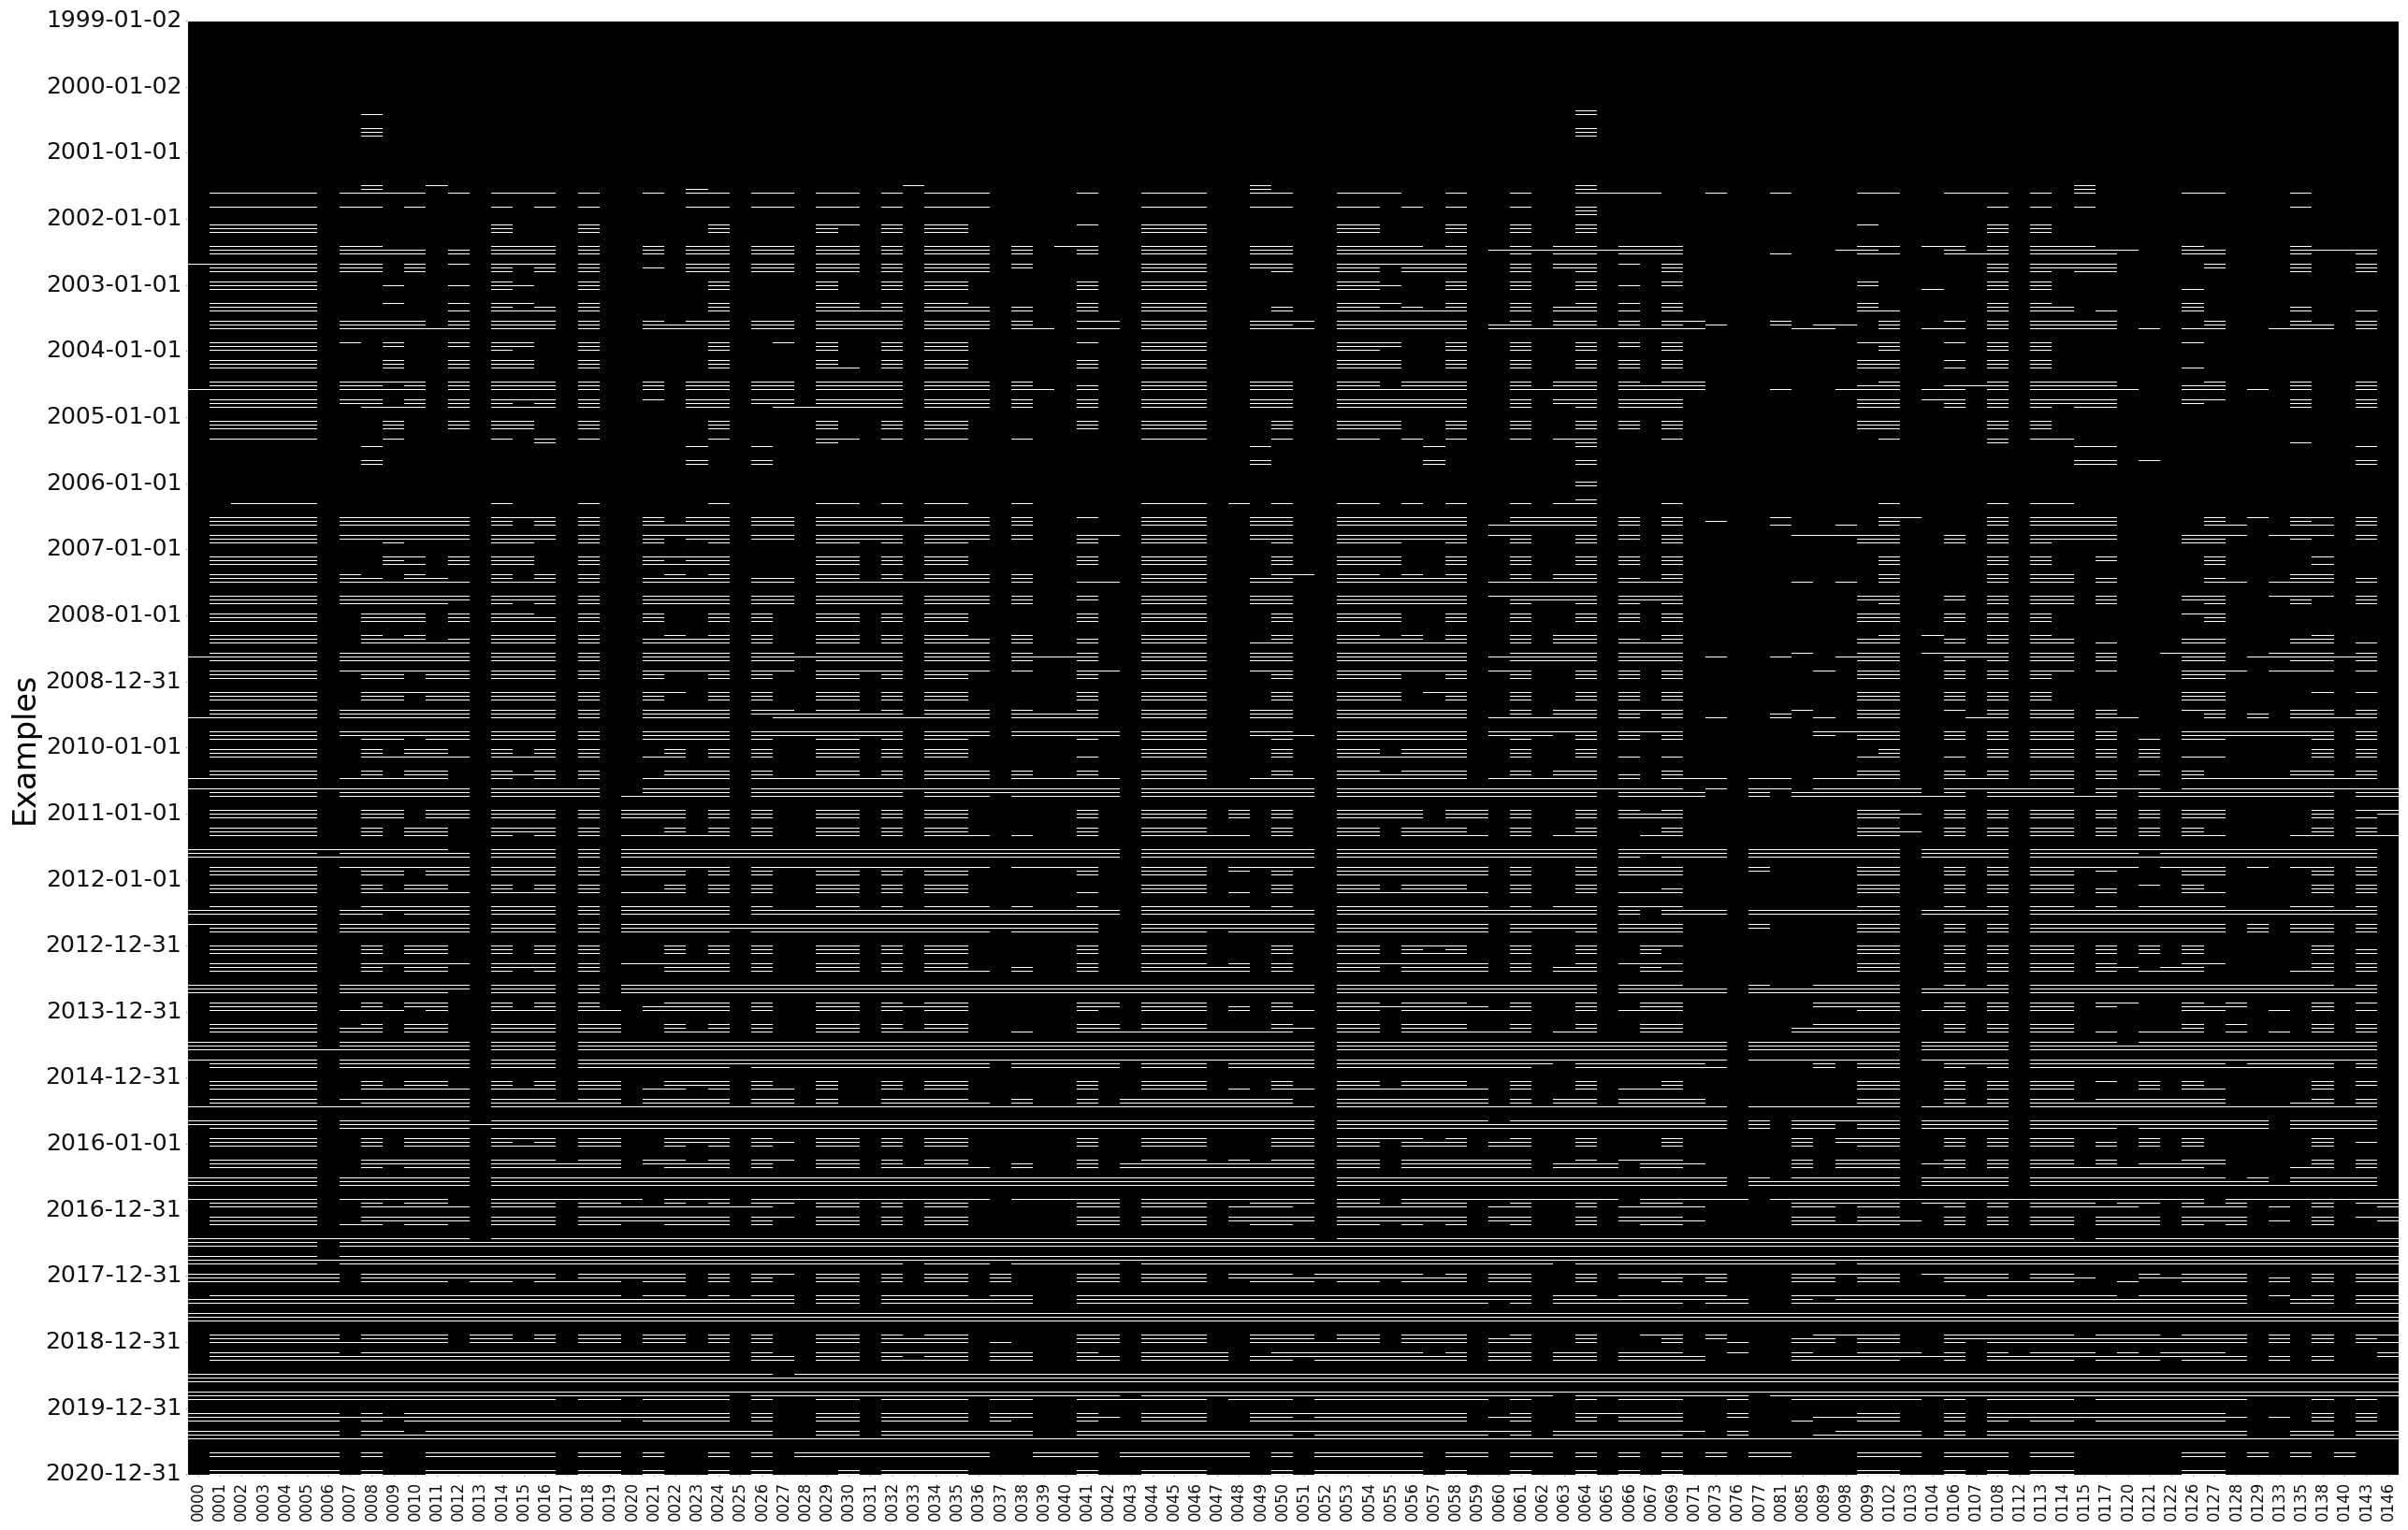

<AxesSubplot: ylabel='Examples'>

In [22]:
EDA(data=streamflow, save=False).heatmap()

C:\Users\ather\.conda\envs\cat_aware\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ather\.conda\envs\cat_aware\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


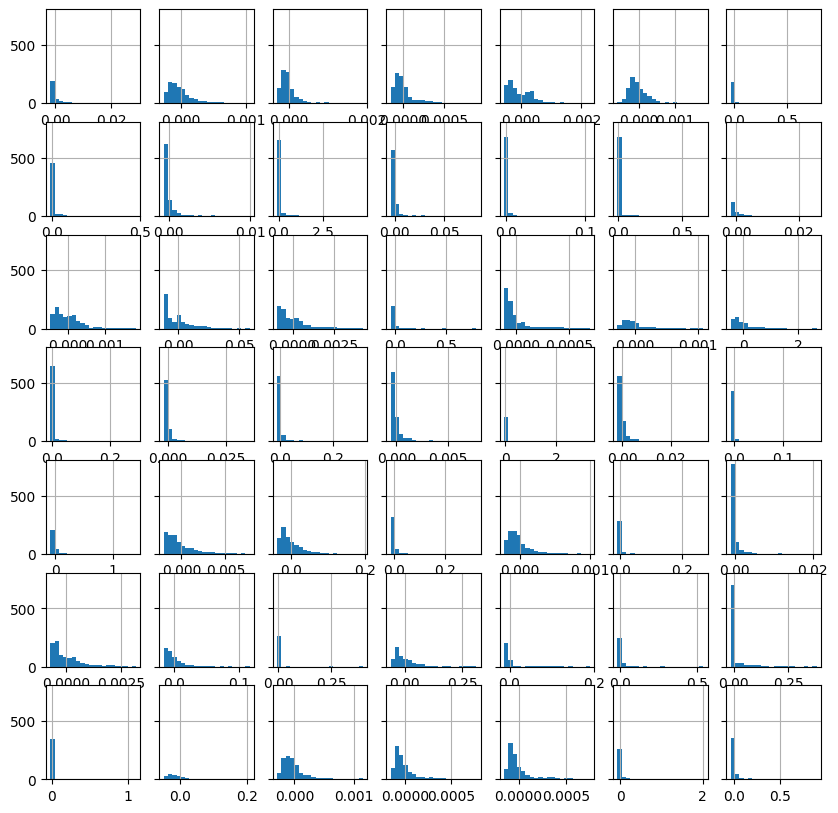

49


In [23]:
st = 0

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

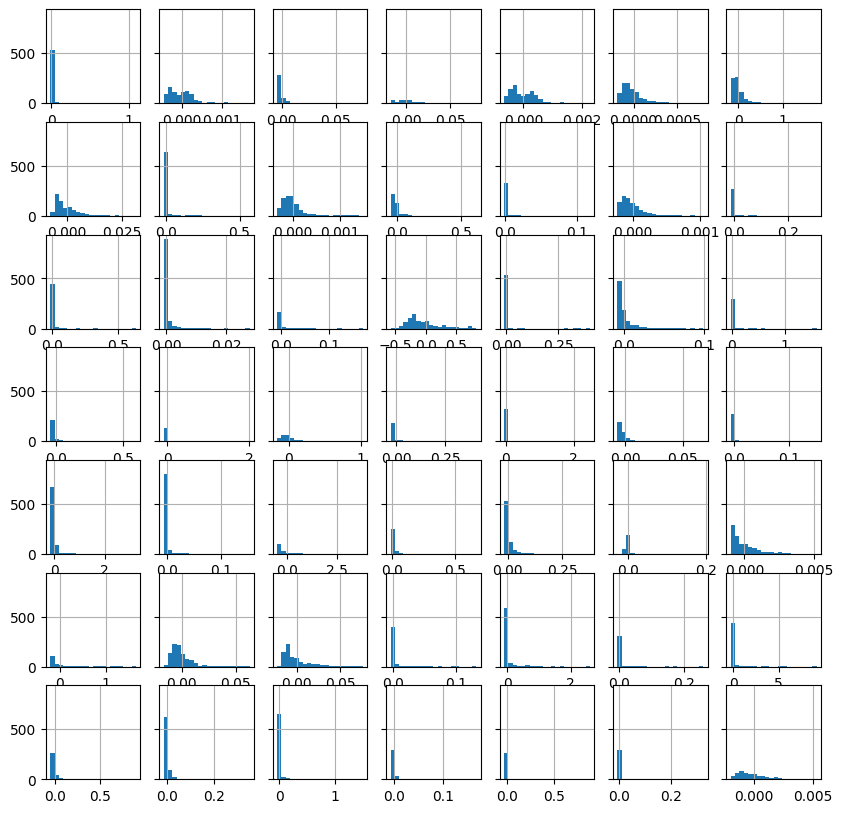

98


In [24]:
st = 49

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

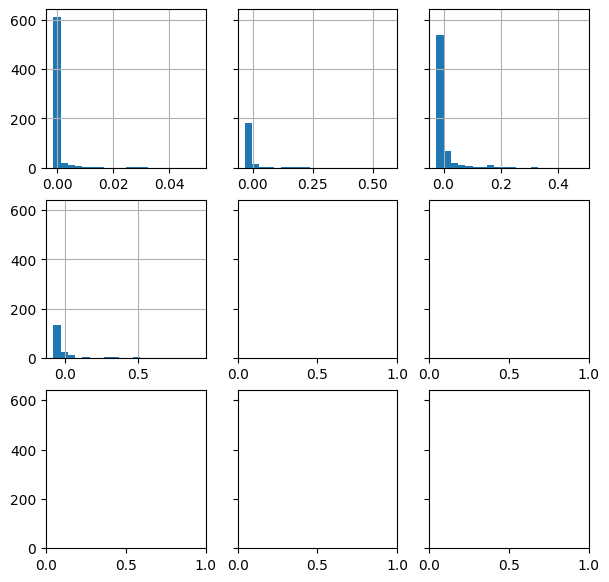

102


In [25]:
st = 98

fig, axes = plt.subplots(3, 3, figsize=(7, 7), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):

    if idx >= 102:
        break

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

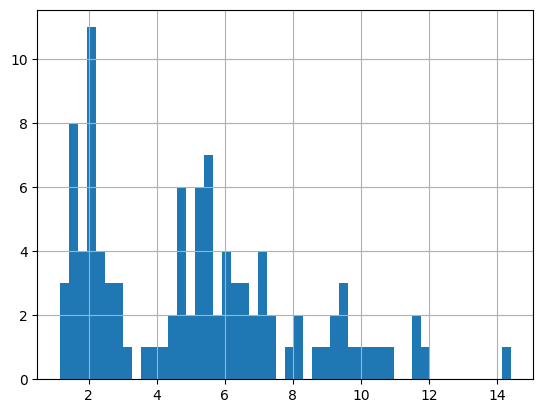

In [26]:
# skewness of streamflow

_ = hist(streamflow.skew().values.reshape(-1,), bins=50)

#### evaporation

(8035, 102)


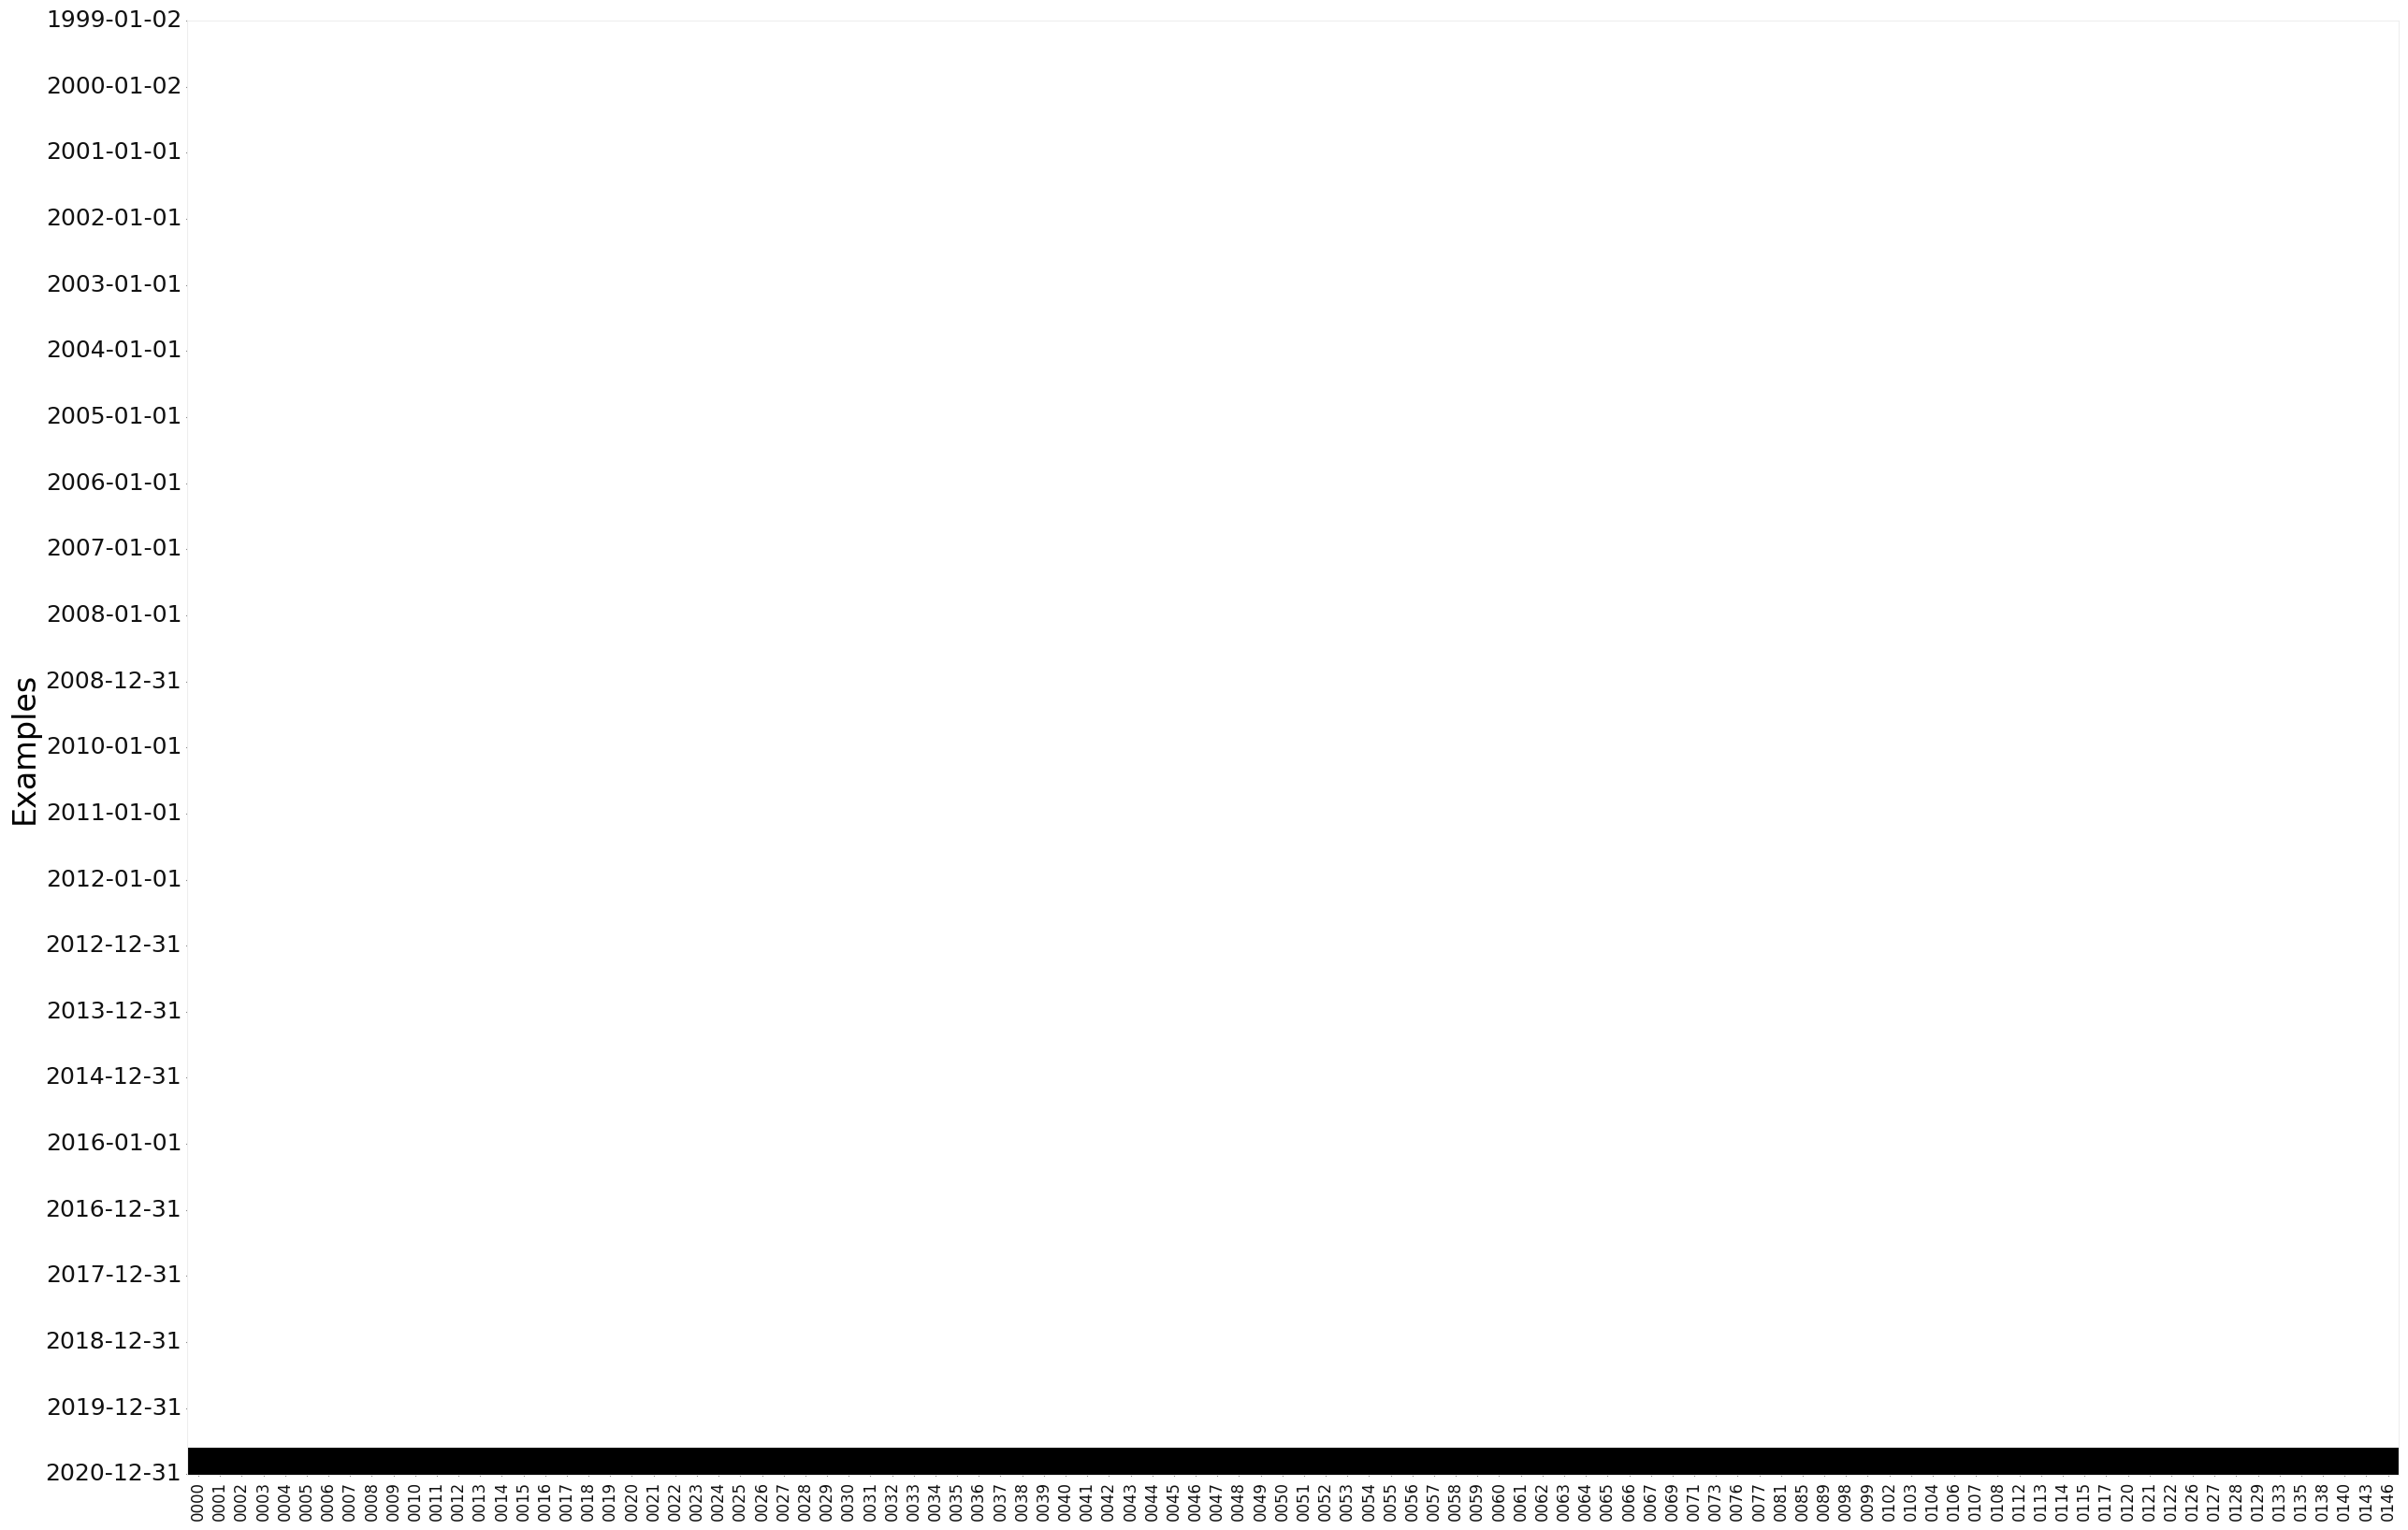

<Axes: ylabel='Examples'>

In [28]:
pet = dataset.fetch(dynamic_features = 'evp', as_dataframe=True)
pet = pet.reset_index()
pet.index = pd.to_datetime(pet.pop('time'))
pet.pop('dynamic_features')
print(pet.shape) 
EDA(data=pet, save=False).heatmap()

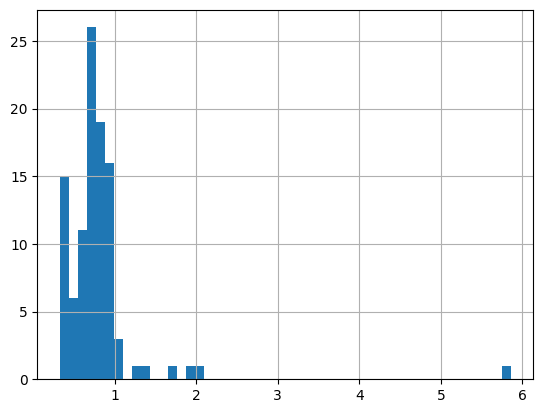

In [29]:
_ = hist(pet.skew().values.reshape(-1,), bins=50)

#### Air Temperature

(8035, 102)


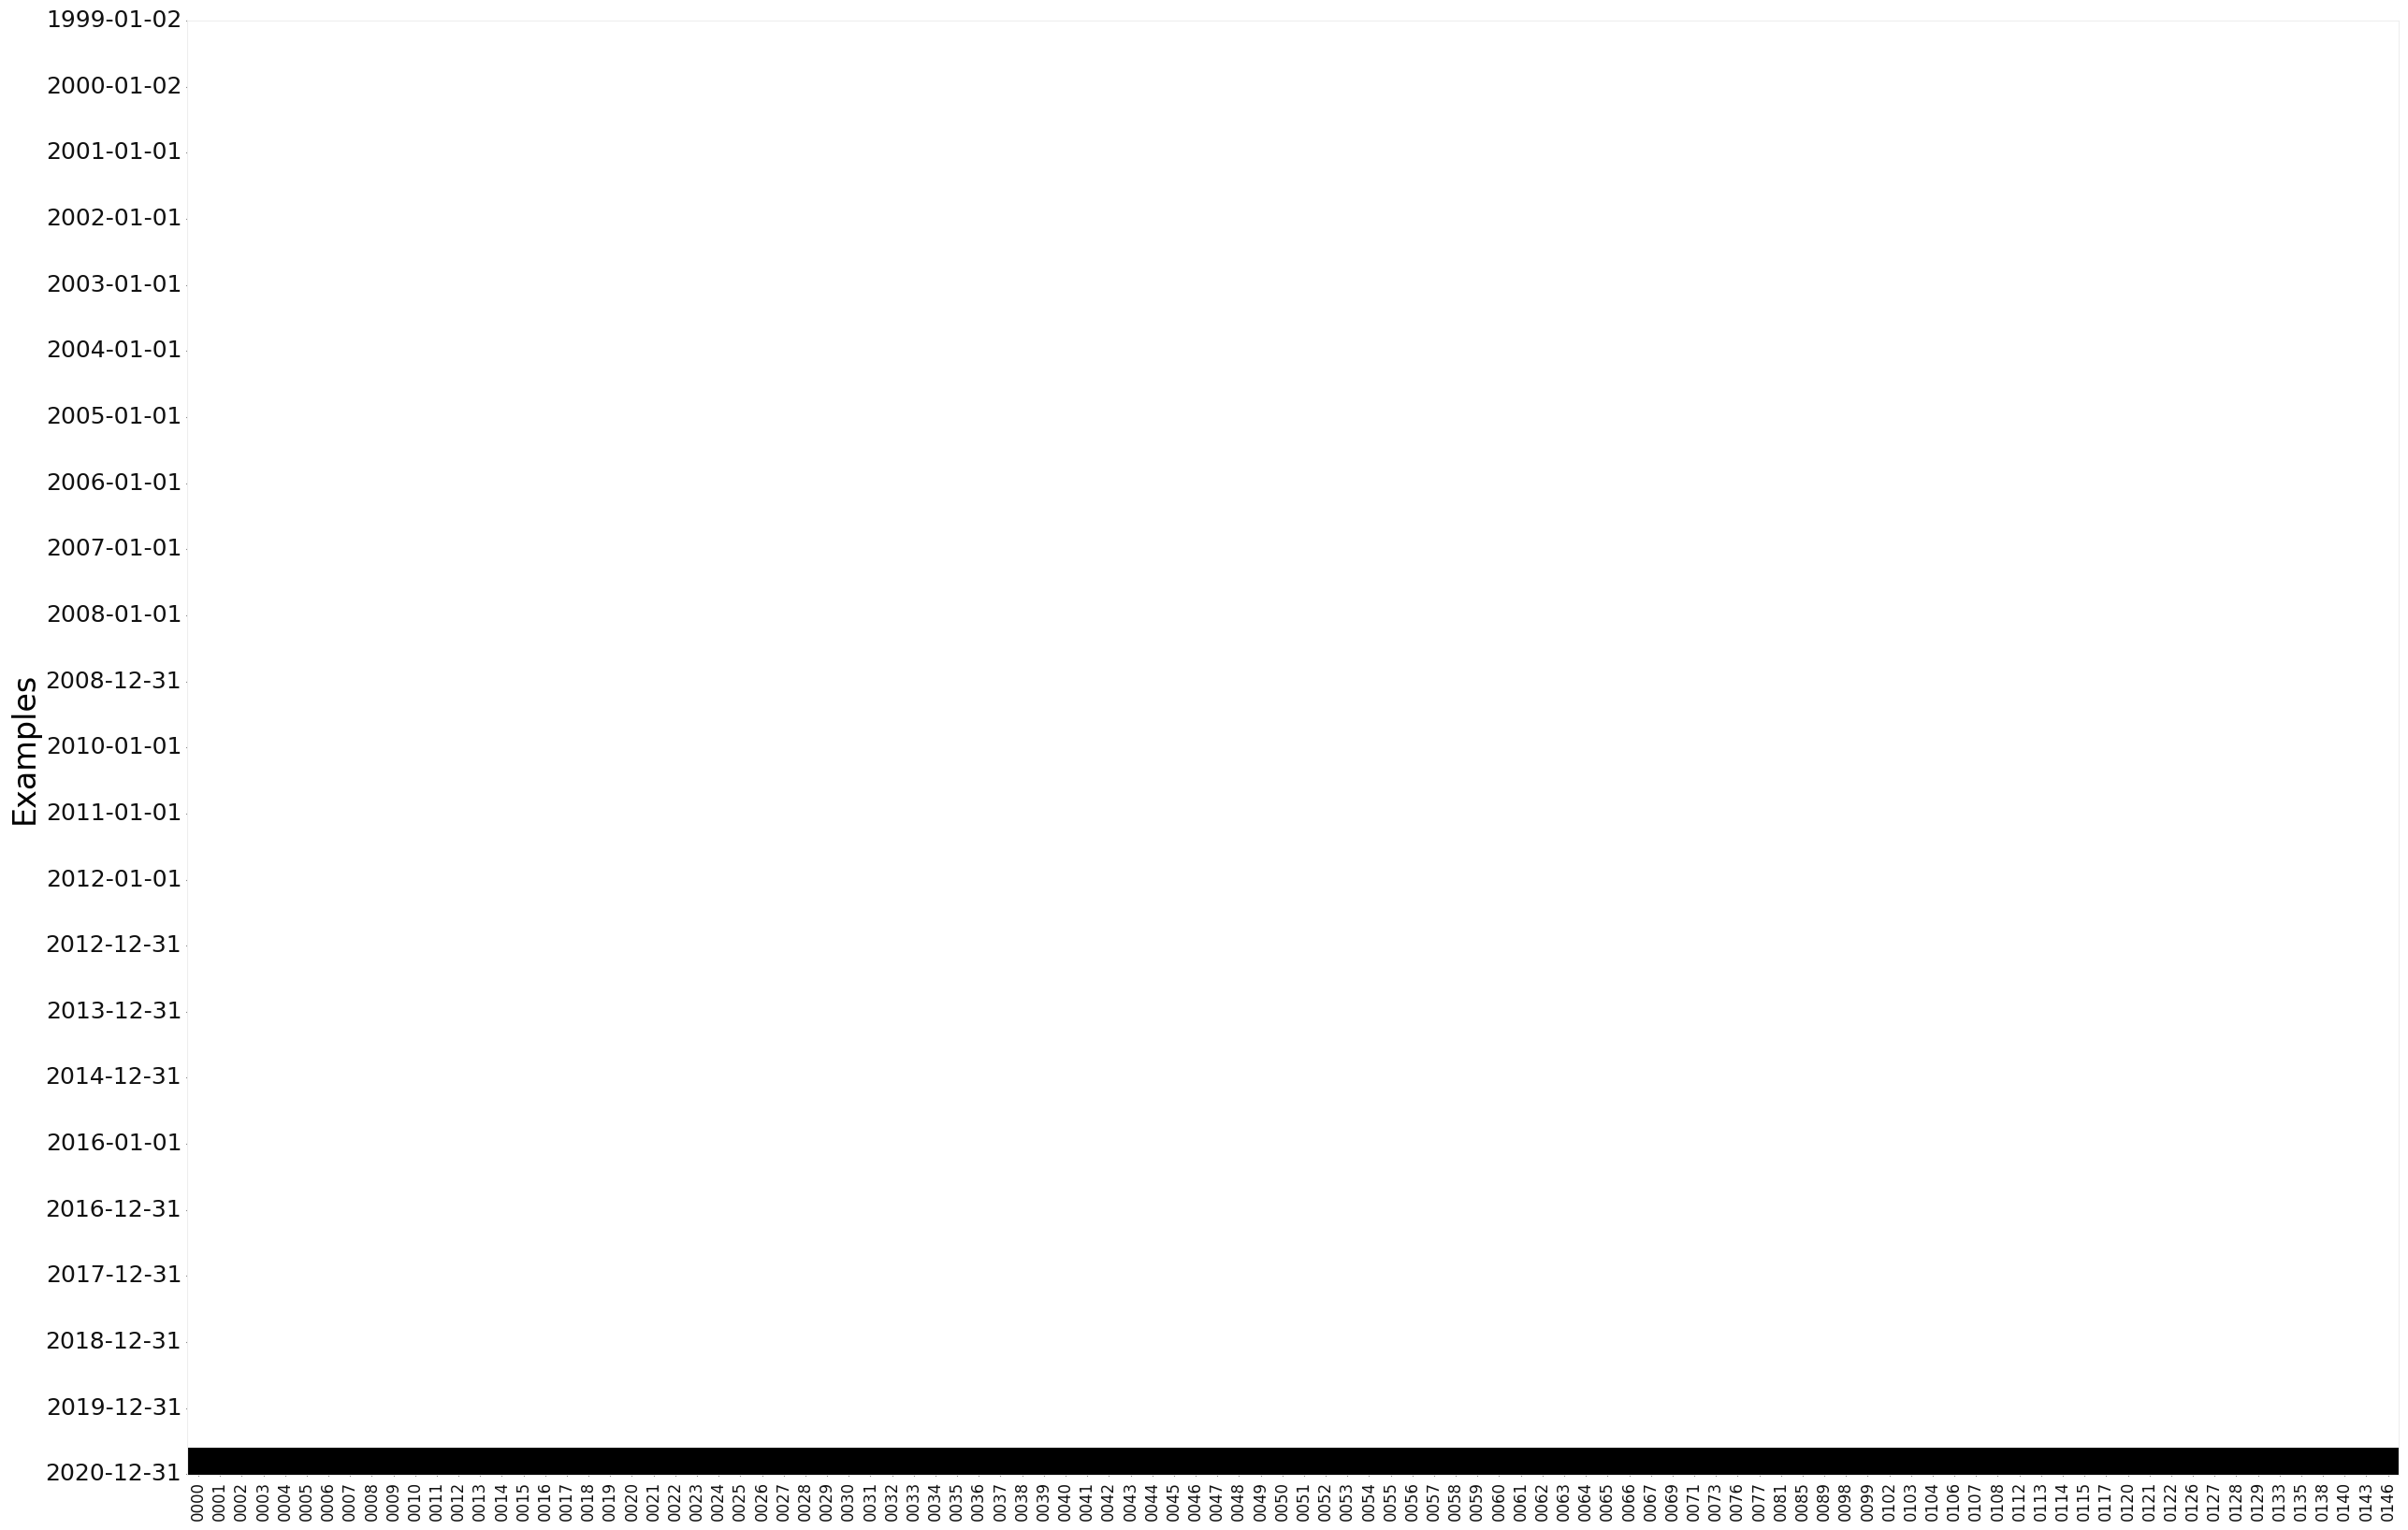

<Axes: ylabel='Examples'>

In [30]:
temp = dataset.fetch(dynamic_features = 'tem_mean', as_dataframe=True)
temp = temp.reset_index()
temp.index = pd.to_datetime(temp.pop('time'))
temp.pop('dynamic_features') 

print(temp.shape)

EDA(data=temp, save=False).heatmap()

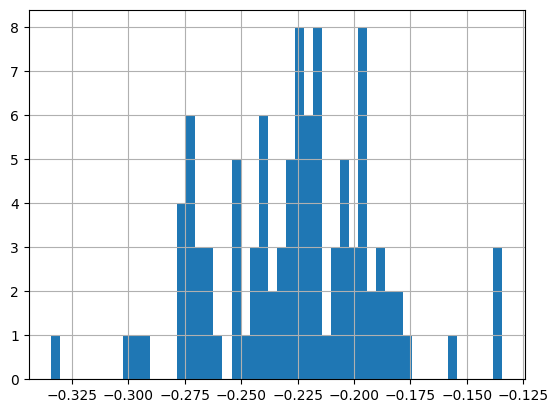

In [31]:

_ = hist(temp.skew().values.reshape(-1,), bins=50)

#### Precipitation


(8035, 102)


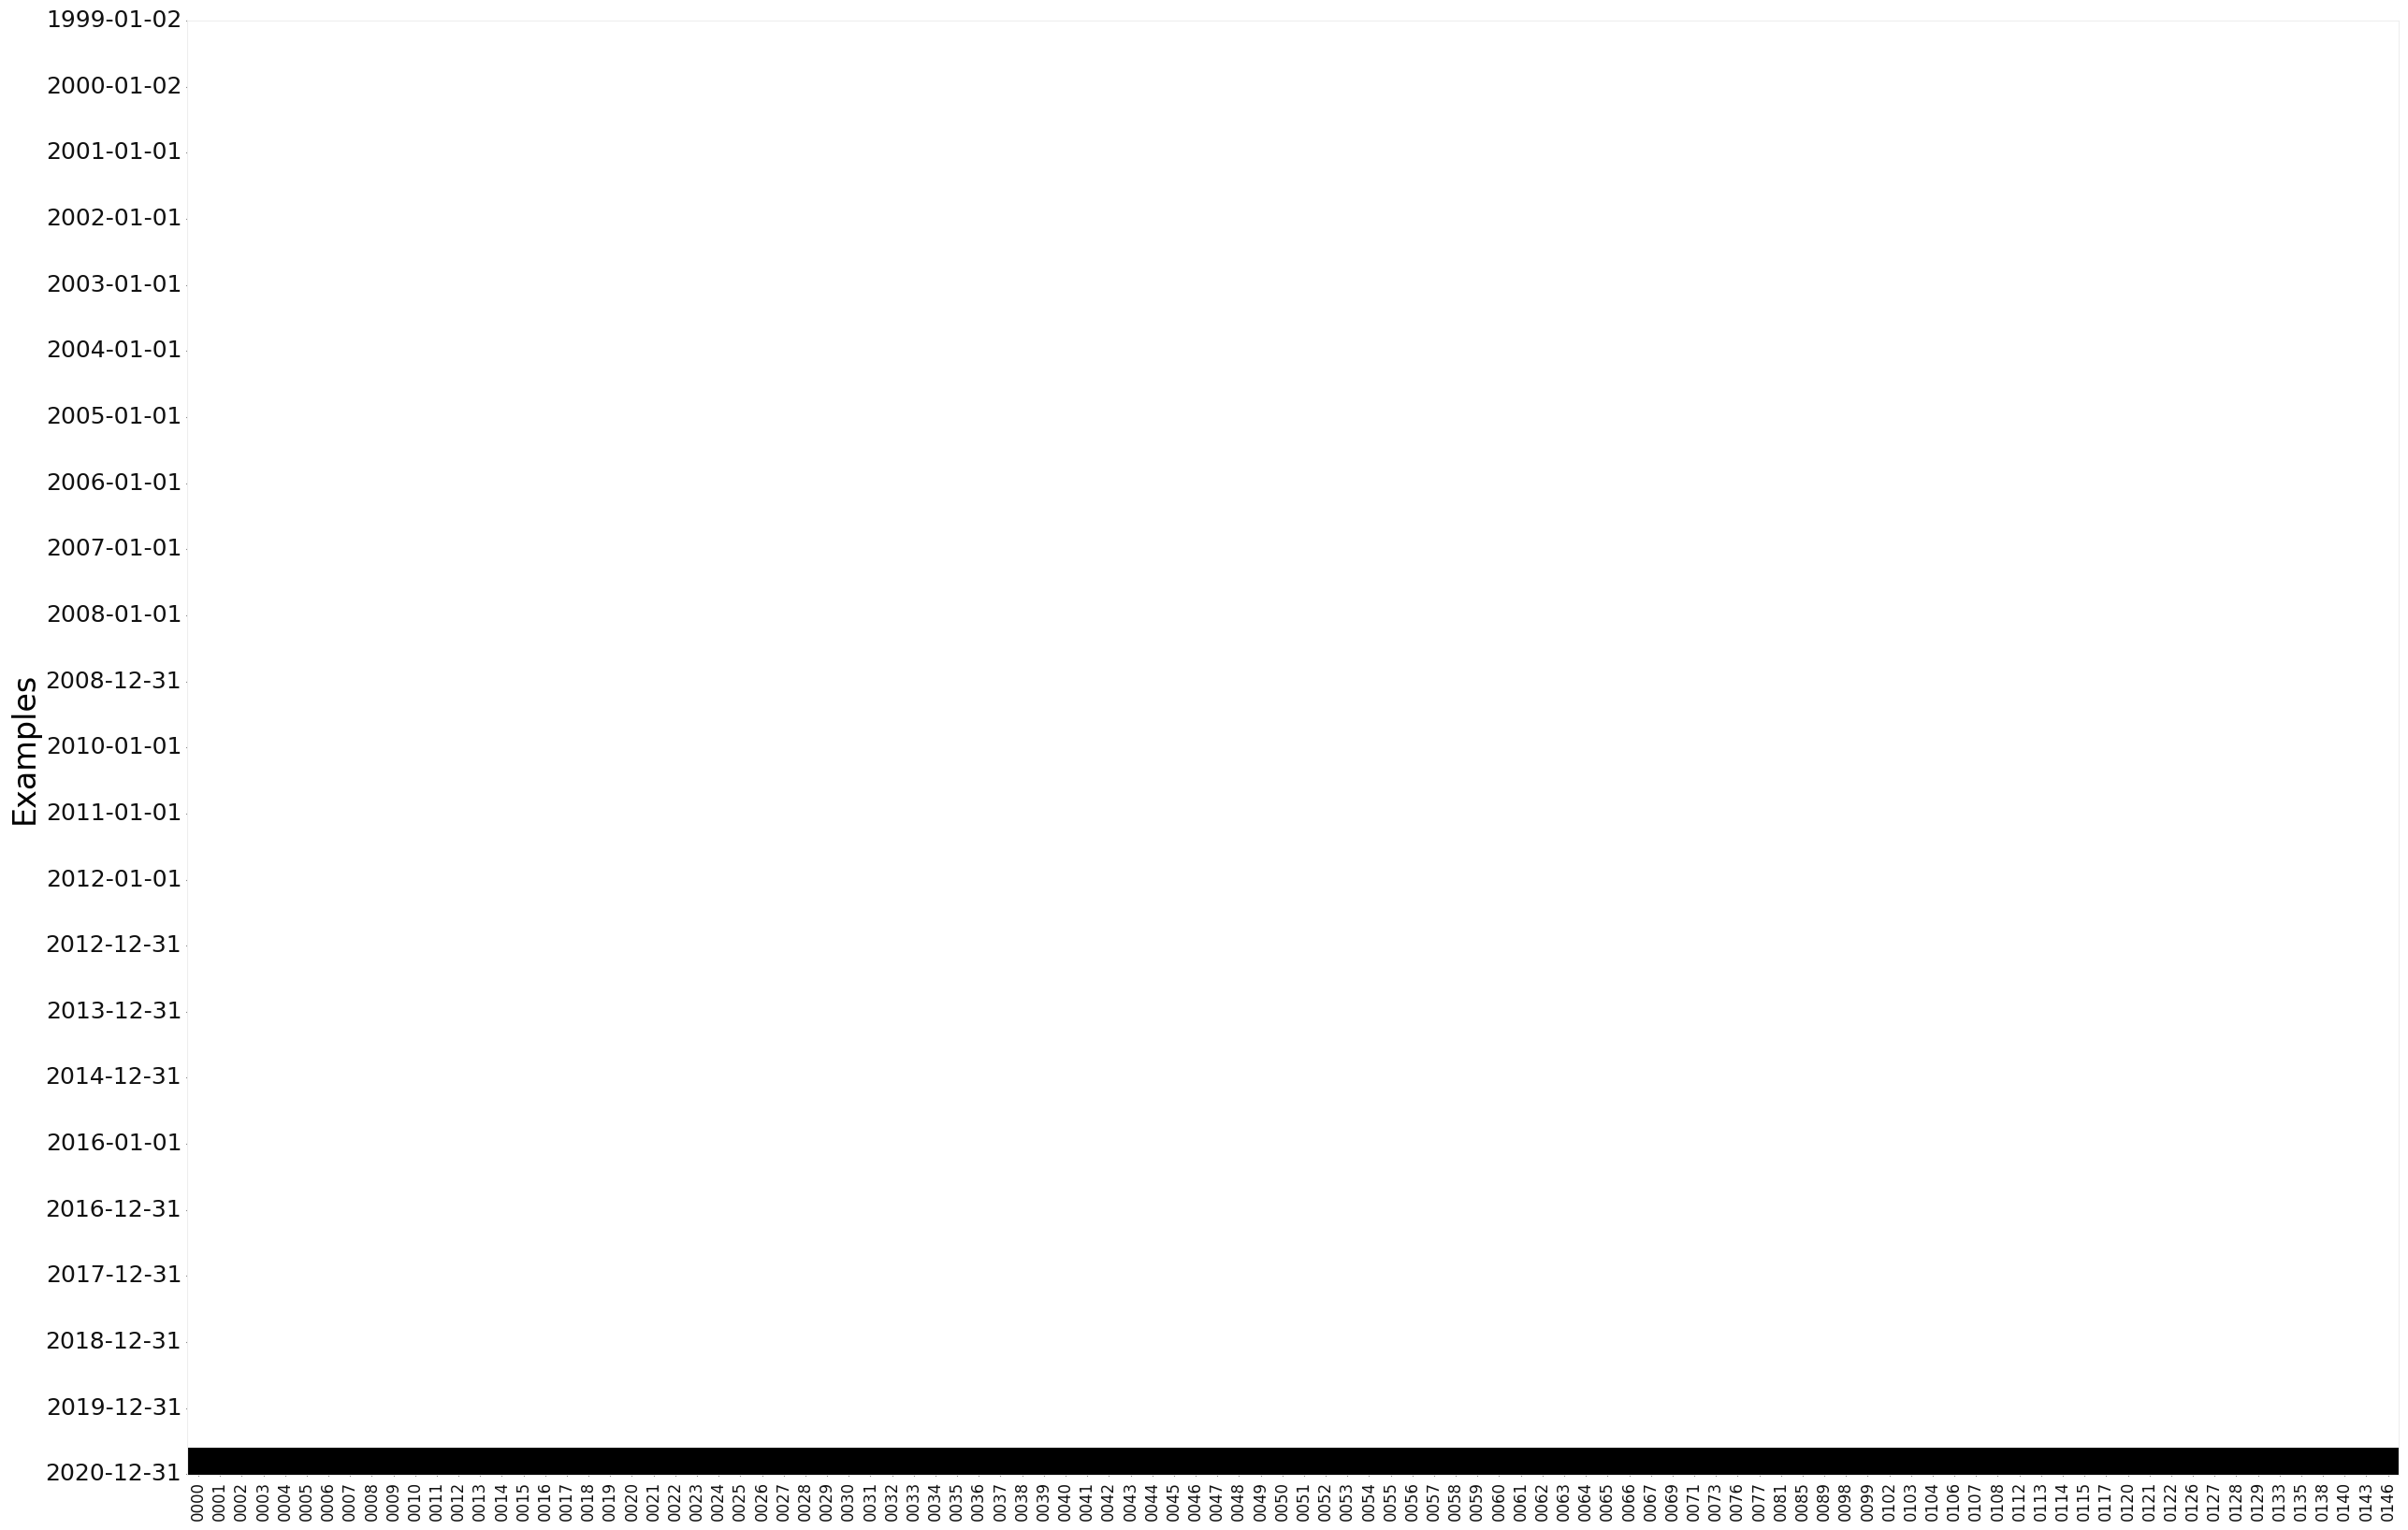

<Axes: ylabel='Examples'>

In [32]:
pcp = dataset.fetch(dynamic_features = 'pre', as_dataframe=True)
pcp = pcp.reset_index()
pcp.index = pd.to_datetime(pcp.pop('time'))
pcp.pop('dynamic_features')
print(pcp.shape) 
EDA(data=pcp, save=False).heatmap()

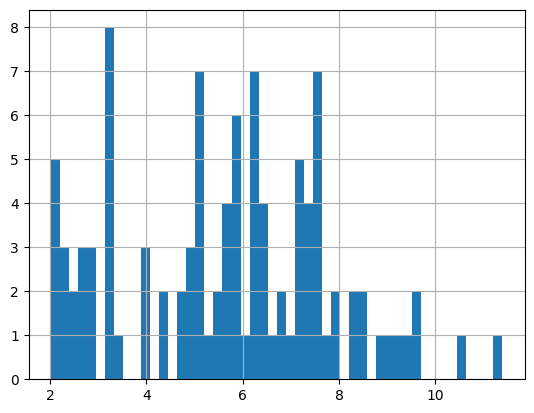

In [33]:
_ = hist(pcp.skew().values.reshape(-1,), bins=50)